# Brownian Motion

## Goals
- Explore properties of brownian motion
    - Simulate sample paths
    - Analyse mean and variance
- Introduce a simple example of Ito math.
- Build a foundation and intivituity of brownian motion for later more complex projects.

## Contents
1. Definition and intuition
2. Simulation of paths
3. Mean and variance over time
4. Independence of increments
5. Ito example: W_t^2

## Imports and configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from option_pricing import sim_brownian, plot_sample_paths

## **1: Definition and intuition**
### Formal definition of Brownian motion
In this Notebook, we will be working with a Brownian motion, which is a continuous-time stochastic process satisfying these properties:
Let $(\Omega,\mathcal{F}, \mathbb{P})$ be a probability space. Then for a Brownian motion $W(t)$, $t \geq 0$
1. $W_0 = 0$ Almost surely
2. $0=t_0​<t_1​<\cdots<t_m$
    $$
    W_{t_{1}}-W_{t_{0}}, W_{t_{2}}-W_{t_{1}}, \cdots, W_{t_{m}}-W_{t_{m-1}}\quad
    \text{are independent and normally distributed, satisfying:}
    $$
3. 
    $
    \mathbb{E}[W(t_{i+1})-W(t_i)] = 0, \quad \forall i 
    $
4. 
    $
    \text{Var}[W(t_{i+1})-W(t_i)] = t_{i+1} - t_i,\quad \forall i
    $

Source: Adapted from S. Shreve, *Stochastic Calculus for Finance II: Continuous-Time Models*, Definition 3.3.1.

### Intuition/Visualisation
- Scaled limit of random walk
- Continous but jagged.
    - Though the function is continuous for every t, it is not differentiable as it is not a smooth function.
- The brownian motion has no tendency to go up or down, see def 3, the Exp val of W(s) at time t = s is W(s). This is not to say that Brownian motion will always converge to 0 but if it attains W(s) the Exp val of W(s) at time t = s is W(s)
- 

### Relevance to Finance

Brownian motion is fundamental to quantitative finance. It is the canonical model for continuous-time randomness and is the process on which Itô calculus is first developed. Because Brownian motion is the continuous-time limit of random walks, it presents a natural way to model a stock's random price fluctuations.

In the Black–Scholes–Merton model, the (discounted) asset price is driven by Brownian motion:
$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$
Here the drift term ($\mu S_t dt$) represents the instantaneous expected growth, while the Brownian term $\sigma S_t dW_t$ models volatitly.

Under the **risk-neutral measure**, we adjust the drift so that the **discounted price** $e^{-rt}S_t$ becomes a martingale. Intuitively, this means that, once you remove the risk-free rate, there is no predictable way to make excess profit: the “fair” expected return of the asset is just the risk-free rate. Brownian motion is still the source of randomness, but the drift changes, and this is what ultimately leads to the Black–Scholes option pricing formula, which we will see in a later notebook _{insert notebook}_.

## Simulation of paths

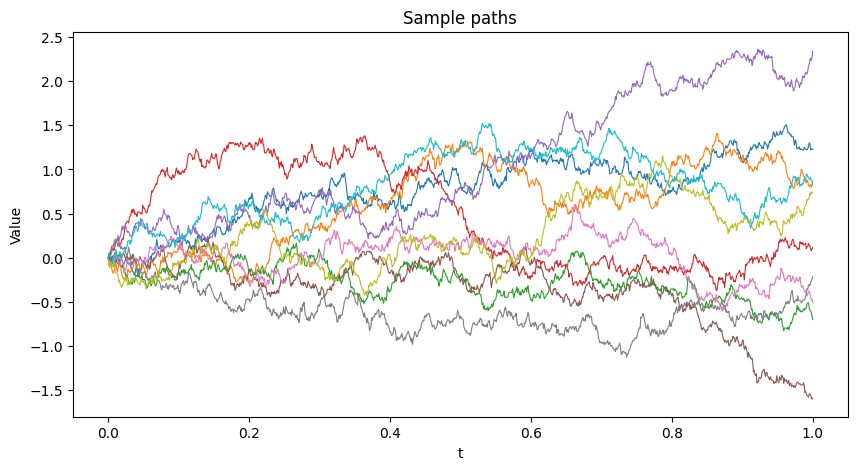

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
np.random.seed(1)
n_paths = 10000
n_steps = 1000
T = 1.0
dt = T / n_steps

# --- Simulate ---
t, paths = sim_brownian(n_paths, T, dt)  # now returns (t, paths)

# --- Plot some sample paths ---
plot_sample_paths(t, paths, n_plot=10)


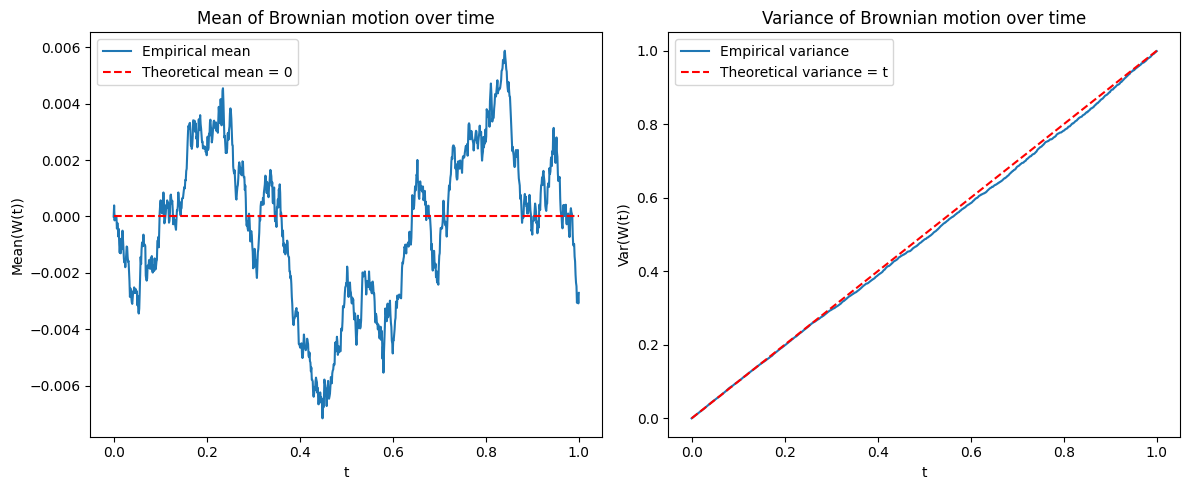

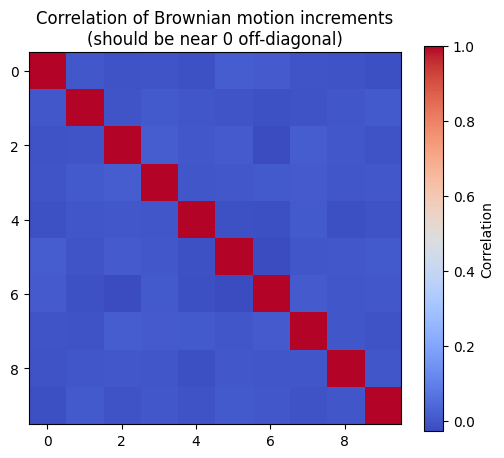

In [5]:
# --- Compute stats across paths ---
mean_t = np.mean(paths, axis=0)
var_t = np.var(paths, axis=0, ddof=0)

# --- Plot mean & variance side by side ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Mean over time
axes[0].plot(t, mean_t, label='Empirical mean')
axes[0].hlines(0, xmin=t[0], xmax=t[-1], colors='r', linestyles='--',
               label='Theoretical mean = 0')
axes[0].set_title("Mean of Brownian motion over time")
axes[0].set_xlabel("t")
axes[0].set_ylabel("Mean(W(t))")
axes[0].legend()

# Variance over time
axes[1].plot(t, var_t, label='Empirical variance')
axes[1].plot(t, t, 'r--', label='Theoretical variance = t')
axes[1].set_title("Variance of Brownian motion over time")
axes[1].set_xlabel("t")
axes[1].set_ylabel("Var(W(t))")
axes[1].legend()

plt.tight_layout()
plt.show()

# --- Check correlations of increments ---
increments = np.diff(paths, axis=1)  # shape (n_paths, n_steps)
n_steps = increments.shape[1]

# Compute correlation matrix of increments at a few time steps (to avoid huge matrix)
sample_indices = np.linspace(0, n_steps - 1, 10, dtype=int)  # pick 10 points
subset_increments = increments[:, sample_indices]  # shape (n_paths, 10)

# Correlation matrix: each column is one increment step
corr_matrix = np.corrcoef(subset_increments.T)

plt.figure(figsize=(6, 5))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Correlation")
plt.title("Correlation of Brownian motion increments\n(should be near 0 off-diagonal)")
plt.show()


Talk about indepency of incerements of BM

## Ito example
In this section I will give an example how Ito's calculus is used as a tool. We will return to more of the math heavy stuff in a later notebook to derive the BSM. For now let us give a simple example.

Given $f(t,X)$, where $X=X(t)$ is a random adapted (mb give def) process. Ito's lemma gives the following rule for the total derivative $d(f(t,x))$
$$d(f(t,X)) = f_{x}(t,X)dX + f_t(t,X)dt + \frac{1}{2}f_{xx}(t,X)dXdX \quad(*)$$

For a Brownian motion $(W(t))_{t \geq 0}$ as defined previously, the following multiplication rules apply:
$$
dWdt = dtdW = dtdt = 0,\quad dWdW = dt
$$
Now, let us look at $f(t, W(t)) = (W(t))^2$ and find its total derivative using
Itô's lemma.

For $f(t,x) = x^2$ xe have
$$
f_t(t,x) = 0, \qquad f_x(t,x) = 2x, \qquad f_{xx}(t,x) = 2.
$$

Applying Itô's lemma with $X(t) = W(t)$ gives
\begin{align*}
d(W(t)^2)
&= f_t\,dt + f_w\,dW(t) + \tfrac{1}{2} f_{ww}\,(dW(t))^2 \\
&= 0\cdot dt + 2W(t)\,dW(t) + \tfrac{1}{2}\cdot 2\,(dW(t))^2.
\end{align*}
Using $(dW(t))^2 = dt$, this simplifies to
$$
d(W(t)^2) = 2W(t)\,dW(t) + dt.
$$

Integrating from $0$ to $t$ we obtain
$$
W(t)^2 - W(0)^2 = 2\int_0^t W(s)\,dW(s) + \int_0^t ds,
$$
so
$$
W(t)^2 = W(0)^2 + 2\int_0^t W(s)\,dW(s) + t.
$$

For a standard Brownian motion $W(0) = 0$, hence
$$
W(t)^2 = 2\int_0^t W(s)\,dW(s) + t.
$$

Let us analyze the expectation value of $W(t)^2$. Define
$$
I(t) := \int_0^t W(s)\,dW(s).
$$
Since $I(t)$ is an Itô integral with adapted integrand, it is a martingale and
$I(0)=0$. Therefore
$$
\mathbb{E}[I(t)] = \mathbb{E}[I(0)] = 0.
$$

Taking expectations in the identity for $W(t)^2$ gives
$$
\mathbb{E}[W(t)^2]
= 2\,\mathbb{E}[I(t)] + t
= 2\cdot 0 + t
= t.
$$
So we recover the familiar result $\mathbb{E}[W(t)^2] = t$.

Lets see if our theory holds up by simulating paths for $W(t)^2$, and computing the mean over time.

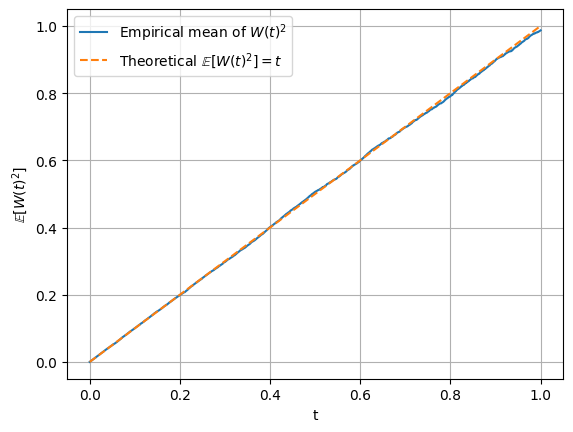

In [7]:
t_step = 1/1000
T = 1.0
n_paths = 10000

# simulate Brownian motion with new signature
t, W_paths = sim_brownian(n_paths=n_paths, T=T, dt=t_step)

# square to get W(t)^2
Wsq_paths = W_paths**2

# empirical mean over all paths
mean_Wsq = Wsq_paths.mean(axis=0)

# plot empirical vs theoretical
plt.figure()
plt.plot(t, mean_Wsq, label='Empirical mean of $W(t)^2$')
plt.plot(t, t, '--', label='Theoretical $\\mathbb{E}[W(t)^2] = t$')
plt.xlabel('t')
plt.ylabel(r'$\mathbb{E}[W(t)^2]$')
plt.legend()
plt.grid(True)
plt.show()


## Summary and Next Steps